# Regression Models in Machine Learning
- predicting values of a feature (price, temperature, salary, sales, etc)
- 4 powerful regression models

## 1. Multiple Linear Regression 
- based on multiple features, forecast 1 target variable, the statistical method used is linear multiple regression

ex, it's like salary depends on skills, education, experience. Instead of 1 factors, we use many features

- works well if the relationship between input features and output is linear
- struggles with non-linear data

tips
- scale data before regression for stability

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
dataset = fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
dataset.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [6]:
# storing independent and dependent variable differently
X, y = dataset.data, dataset.target

In [7]:
# spliting dataset in 80, 20 parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# initialize model
lr = LinearRegression()

In [9]:
# train the model
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)

In [11]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [12]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [13]:
score = r2_score(y_test, y_pred)
print("Multiple Linear Regression R2 Score:", score)

Multiple Linear Regression R2 Score: 0.5757877060324521


## Decision Tree Regressor 
- keep on narrowing options based on decision, at the end of these splits, it predicts a value

ex, Imagine asking yes/no questions like:
- shaadi.com for partner selection
- non- linear patterns
- easy to visualize

tips
- noisy data

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
# storing independent and dependent variable differently
X, y = dataset.data, dataset.target

In [17]:
# spliting dataset in 80, 20 parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#initialize model
dt = DecisionTreeRegressor(max_depth=5, random_state=42)

In [19]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [20]:
y_pred = dt.predict(X_test)

In [21]:
r2_score(y_test, y_pred)

0.5997321244428706

## 3. Random Forest Regressor
- Instead of one tree, builds many trees and average their predictions

ex, before reserving a ride, you check rapido, uber, ola
 - non linear ver large dataset
 - better accuracy, but slower

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

In [25]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [26]:
y_pred = rf.predict(X_test)

In [27]:
r2_score(y_test, y_pred)

0.7737402686595128

# AdaBoost Regressor
 - Adaptive Boosting
- boosting = teach a weak learner step by step
- Each new tree focuses on correcting errors of the previous one
- Combines them into a strong model

In [29]:
from sklearn.ensemble import AdaBoostRegressor

In [30]:
ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [31]:
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=42)

In [32]:
y_pred = ada.predict(X_test)

In [33]:
r2_score(y_test, y_pred)

0.5663981417281327

Exercise - 
1. Which model would you use for - <br>
                            1. predicting house rent based on many factors (linear - linear regression, non - linear - decision tree)
                            2. predict temperature - decision tree

overfitting, underfitting

# XGBoost

- Extreme Gradient Boost
- an advanced boosting algorithm
- It builds trees one after another, improving step by step like AdaBoost, but it's
   - Faster
   - Accurate
   - Works well with big data

In [37]:
pip install xgboost

In [38]:
from xgboost import XGBRegressor

In [39]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [40]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [41]:
y_pred = xgb.predict(X_test)

In [42]:
r2_score(y_test, y_pred)

0.814103964336009

# KNN (K-Nearest Neighbour)

- To predict a value, it looks at the closest neighbours in the dataset and takes the average

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
knn = KNeighborsRegressor(n_neighbors=10)

In [46]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [47]:
y_pred = knn.predict(X_test)

In [48]:
r2_score(y_test, y_pred)

0.15538785394268484

# SVM Regressor

- Support Vector Machine 
- tries to fit a line (or curve) so that most points are within a margin
- great for high dimensional data

In [50]:
from sklearn.svm import SVR

In [51]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.3)

In [52]:
svr.fit(X_train, y_train)

SVR(C=100, epsilon=0.3, gamma=0.1)

In [53]:
y_pred = svr.predict(X_test)

In [54]:
r2_score(y_test, y_pred)

0.14971998793562247

# Evaluation Metrics for Regression

- When evaluating regressors, we don't just look at accuracy. 

1. Mean Squared Error (MSE)
   - avg of squared errors
   - penalizes mistakes heavily
   - lower = better

2. Root Mean Squared Error
   - Square root of MSE
   - Some unit as target (easy to understand)
   - lower = better

3. R2 score (Coefficient of Determination)
   - Measures how well model explains variance
   - ranges from (-infinite) to 1
   - closer to 1 = better

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
y_pred = lr.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, y_pred)
mse

0.5558915986952425

In [59]:
rmse = mse ** 0.5
rmse

0.7455813830127751

In [60]:
r2_score(y_test, y_pred)

0.5757877060324521

In [62]:
import matplotlib.pyplot as plt

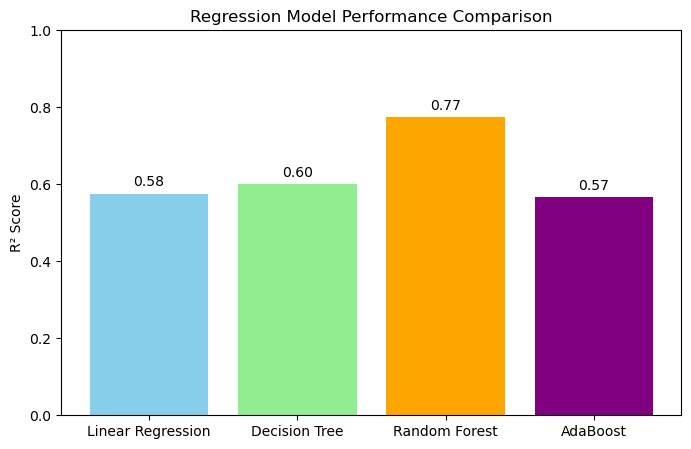

In [64]:
# Collect models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Store results
scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[name] = r2_score(y_test, y_pred)

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(scores.keys(), scores.values(), color=['skyblue','lightgreen','orange','purple'])
plt.ylabel("R² Score")
plt.title("Regression Model Performance Comparison")
plt.ylim(0,1)  # R² ranges between -∞ and 1
for i, (name, score) in enumerate(scores.items()):
    plt.text(i, score+0.02, f"{score:.2f}", ha='center', fontsize=10)
plt.show()


# Hyperparameter Tuning (Grid Search)

- Every model has hyperparameters (settings we choose before training)
ex, 
    - dt - max_depth
    - rf - n_estimators
    - KNN - n_neighbours

Instead of guessing, we use Grid Search to test different combinations and find the best

# Homework

Make bar chart visualizations of all the regression techniques trained in your sessions. Try other visualizations and report the best.